# Integrating spheres

**Scott Prahl**

**June 2021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iadpython.sphere
%config InlineBackend.figure_format='retina'


## Port areas

If we look at a cross-section of an integrating sphere used in to measure transmission (left) and reflection (right) then we can see the diameters of the sphere and each of the ports.

<center>
    <img src="sphere.png" width="50%" />
</center>

The natural thing would be to use subscripts and define the relative area of the sample as $a_\mathrm{sample}$. Relative area parameters are 

$$
a_\mathrm{sample} = \frac{\mbox{Area of sample port}}{\mbox{Surface area of integrating sphere}}
$$

Other relative areas are the area of the detector  $a_\mathrm{detector}$, the area of the entrance port $a_\mathrm{entrance}$, and the area of the sphere wall $a_\mathrm{wall}$

The total sphere surface includes the sphere has wall and ports (sample, detector, and entrance).  Thus

$$
A_\mathrm{total} = A_\mathrm{wall} + A_\mathrm{sample} +  A_\mathrm{detector} +  A_\mathrm{entrance}
$$

or in terms of dimensionless relative areas 

$$
a_\mathrm{wall} = 1 -  a_\mathrm{sample} - a_\mathrm{detector} - a_\mathrm{entrance}
$$

### Spherical caps

The ports consist of holes in the sphere created by a plane passing through the edge of the sphere.  This means that the area of the disk $\pi a^2$ differs slightly from the area of the subtended surface area of sphere that was removed.  This section is for those who worry about such things.

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Spherical_cap_diagram.tiff/lossless-page1-597px-Spherical_cap_diagram.tiff.png" width="15%"/>
</center>

Note that a port with radius $a$ has a cap area on a sphere with radius $r$

$$
A_\mathrm{cap} = 2\pi r h
$$
where $h$ is the height of the cap
$$
h = r - \sqrt{r^2-a^2}
$$

The relative area is then

$$
a_\mathrm{cap} = \frac{2\pi r h}{4\pi r^2} = \frac{r - \sqrt{r^2-a^2}}{2r} \approx \frac{a^2}{4r^2} - \frac{a^4}{16r^4} + \cdots
$$

This can be compared directly with the normalized area of a disk divided by the surface area of the sphere:

$$
a_\mathrm{cap}' = \frac{\pi a^2}{4\pi r^2} = \frac{a^2}{4r^2}  = \frac{d_\mathrm{cap}^2}{4d_\mathrm{sphere}^2}
$$

This is a tiny change from the naive approach; since $a_\mathrm{cap}<0.01$ typically, the cap area error will be less than 1%.


## Integrating spheres are used to collect all light

The interior surfaces are a matte white paint (in the past this was something like a white MgSO₄ or BaSO₄) that causes any light in the sphere to bounce around multiple times in the sphere.  It does this until the light on the walls of the sphere are uniform.

### Simplest Case: No reflection from ports

The simplest thing is to assume that the ports completely absorb any light that falls on them.  Consider the case of a beam of light (P₀) that hits the wall and becomes perfectly diffuse, 

$$
\mbox{first bounce} = P_0 r_0
$$

This light then falls on all the sphere walls.  The total light reflected by the walls after this first bounce will be 

$$
\mbox{second bounce} = (P_0 r_0) \times (r_\mathrm{wall} a_\mathrm{wall})
$$

this light will then be reflected again and the light hitting all walls for the second bounce will be

$$
\mbox{third bounce} = (P_0 r_0) \times (r_\mathrm{wall} a_\mathrm{wall}) \times (r_\mathrm{wall} a_\mathrm{wall})
$$

The total power on the walls will be

$$
P_\mathrm{wall} = \mbox{(power from first bounce)}  + \mbox{(power from second bounce)} + \cdots
$$

or

$$
P_\mathrm{wall} = P_0 r_0(1 + (r_\mathrm{wall}a_\mathrm{wall}) + (r_\mathrm{wall}a_\mathrm{wall})^2 + \cdots) = \frac{r_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}} P_0
$$

This suggests introducing a sphere multiplier $M$ defined as

$$
M = \frac{P_\mathrm{wall}}{P_0} = \frac{r_0}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$

and if the light hits the sphere wall first $r_0=r_\mathrm{wall}$ so

$$
M =  \frac{r_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$


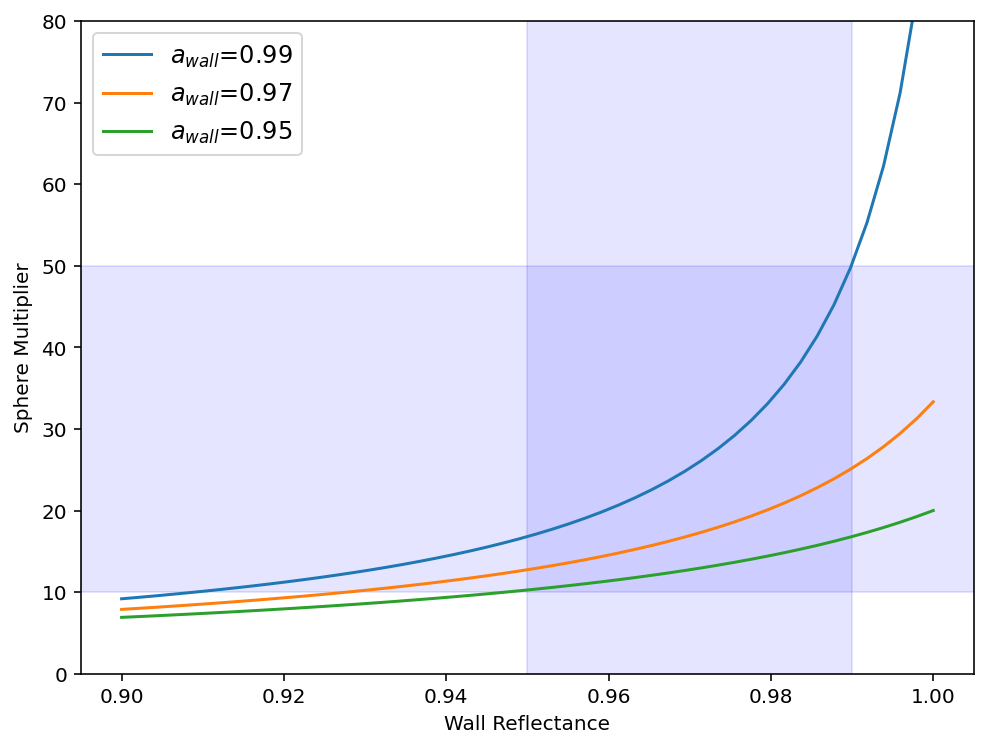

In [2]:
sphere_diameter = 250
r_wall = np.linspace(0.9,1,50)
s = iadpython.sphere.Sphere(sphere_diameter, 1)

plt.figure(figsize=(8,6))

s.a_wall = 0.99
plt.plot(r_wall, s.multiplier(UR1=1, URU=0, r_wall=r_wall), label='$a_{wall}$=%.2f'%s.a_wall)

s.a_wall = 0.97
plt.plot(r_wall, s.multiplier(UR1=1, URU=0, r_wall=r_wall), label='$a_{wall}$=%.2f'%s.a_wall)

s.a_wall = 0.95
plt.plot(r_wall, s.multiplier(UR1=1, URU=0, r_wall=r_wall), label='$a_{wall}$=%.2f'%s.a_wall)

plt.legend(fontsize=12)
plt.xlabel('Wall Reflectance')
plt.ylabel('Sphere Multiplier')
plt.ylim(0,80)

plt.axvspan(0.95,0.99,color='blue',alpha=0.1)
plt.axhspan(10,50,color='blue',alpha=0.1)


plt.show()

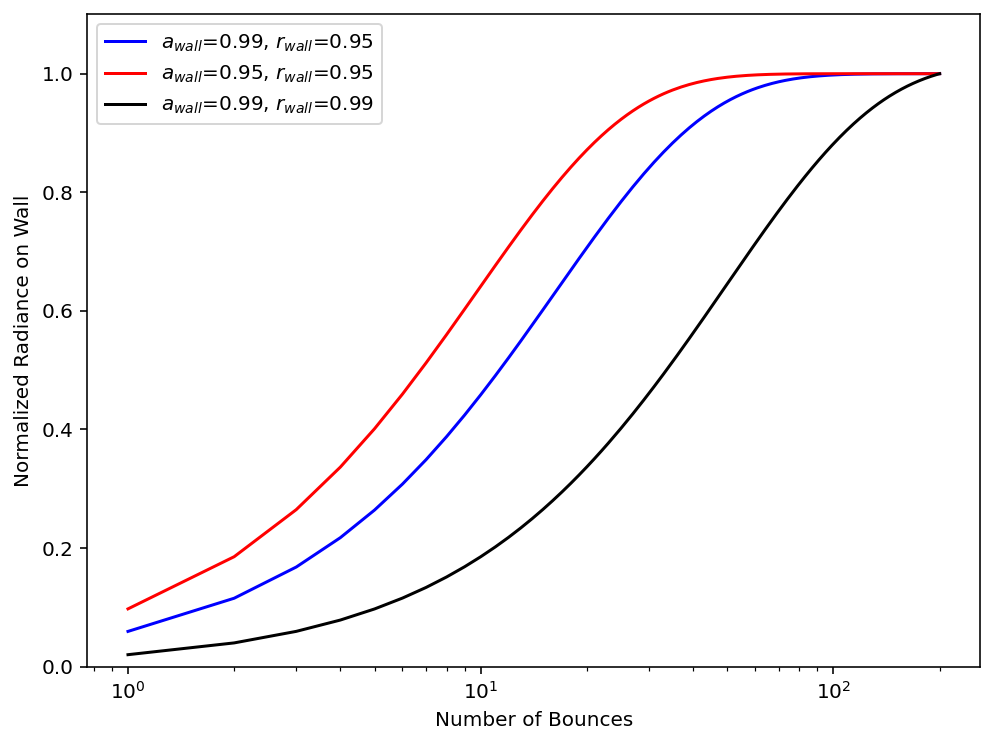

In [3]:
bounces = np.linspace(1,200,200)
plt.figure(figsize=(8,6))

a_wall = 0.99
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.semilogx(bounces, r_cum/np.max(r_cum), 'b', label=label)

a_wall = 0.95
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.semilogx(bounces, r_cum/np.max(r_cum), 'r', label=label)

a_wall = 0.99
r_wall = 0.99
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.semilogx(bounces, r_cum/np.max(r_cum), 'k', label=label)

plt.legend()
plt.xlabel('Number of Bounces')
plt.ylabel('Normalized Radiance on Wall')
plt.ylim(0,1.1)

plt.show()

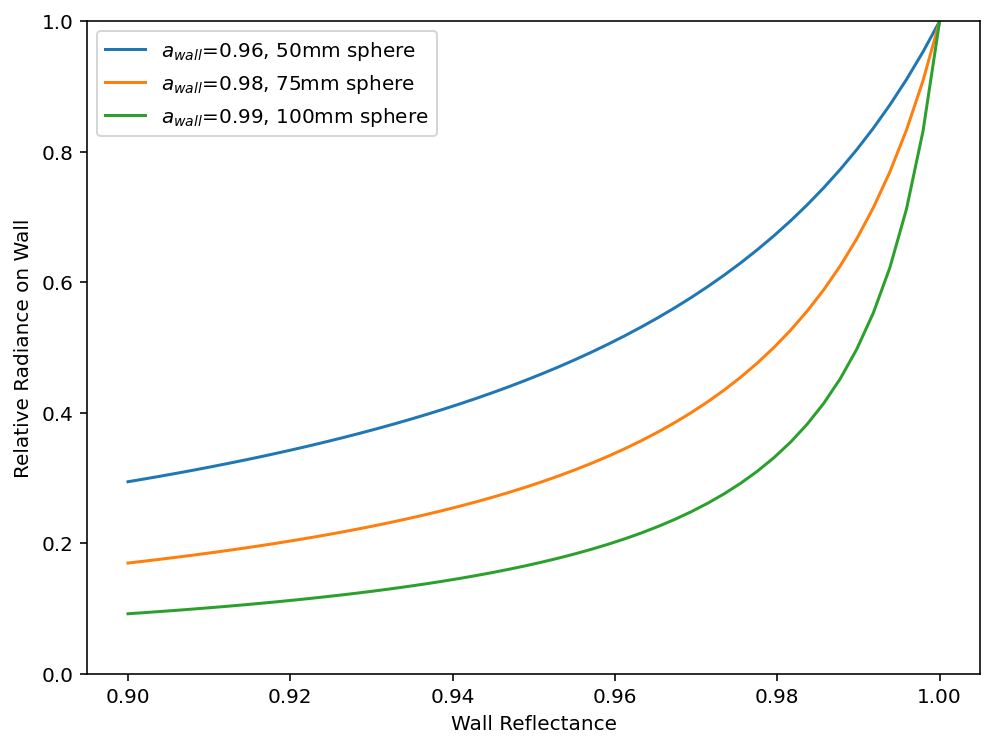

In [4]:
r_wall = np.linspace(0.9,1,50)
s = iadpython.sphere.Sphere(50, 1)
plt.figure(figsize=(8,6))

s.d_sphere = 50
s.a_wall = 0.96
M = s.multiplier(UR1=1, URU=0, r_wall=r_wall)
label='$a_{wall}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d_sphere)
plt.plot(r_wall, M/np.max(M), label=label)

s.d_sphere = 75
s.a_wall = 0.98
M = s.multiplier(UR1=1, URU=0, r_wall=r_wall)
label='$a_{wall}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d_sphere)
plt.plot(r_wall, M/np.max(M), label=label)

s.d_sphere = 100
s.a_wall = 0.99
M = s.multiplier(UR1=1, URU=0, r_wall=r_wall)
label='$a_{wall}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d_sphere)
plt.plot(r_wall, M/np.max(M), label=label)


plt.legend()
plt.xlabel('Wall Reflectance')
plt.ylabel('Relative Radiance on Wall')
plt.ylim(0,1)

plt.show()

## Slightly more general case

The reflectance of each the ports is not usually 0%.  

```
port         reflection
------------------------
entrance     0
wall         r_wall
sample       r_sample
detector     r_detector
```

The entrance port is still empty and its reflectance will be 0.  However, there is nearly always a sample and a detector.  If we include these when calculating the total light then we get slightly different equations.  

We start with a power $P_0$ entering the sphere.  All of this light hits the sphere wall (i.e., none hits the ports) and is reflected by the wall

$$
\mbox{first bounce} = r_0 P_0
$$

This refleced light then falls on the entire sphere.  The total light reflected is now 

$$
\mbox{second bounce} = (r_0 P_0)\times (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})
$$

This light will then be reflected again and the light hitting all walls for the second bounce will be

$$
\mbox{third bounce} = (r_0 P_0) \times (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})^2
$$

The total power on the walls will be

$$
P_\mathrm{wall} = \frac{r_0 }{1-(r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})} P_0
$$

This suggests introducing a sphere multiplier $M$ defined as

$$
M = \frac{P_\mathrm{wall}}{P_0} = \frac{r_0}{1-(r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})} = \frac{r_0}{1-r_\mathrm{average}}
$$

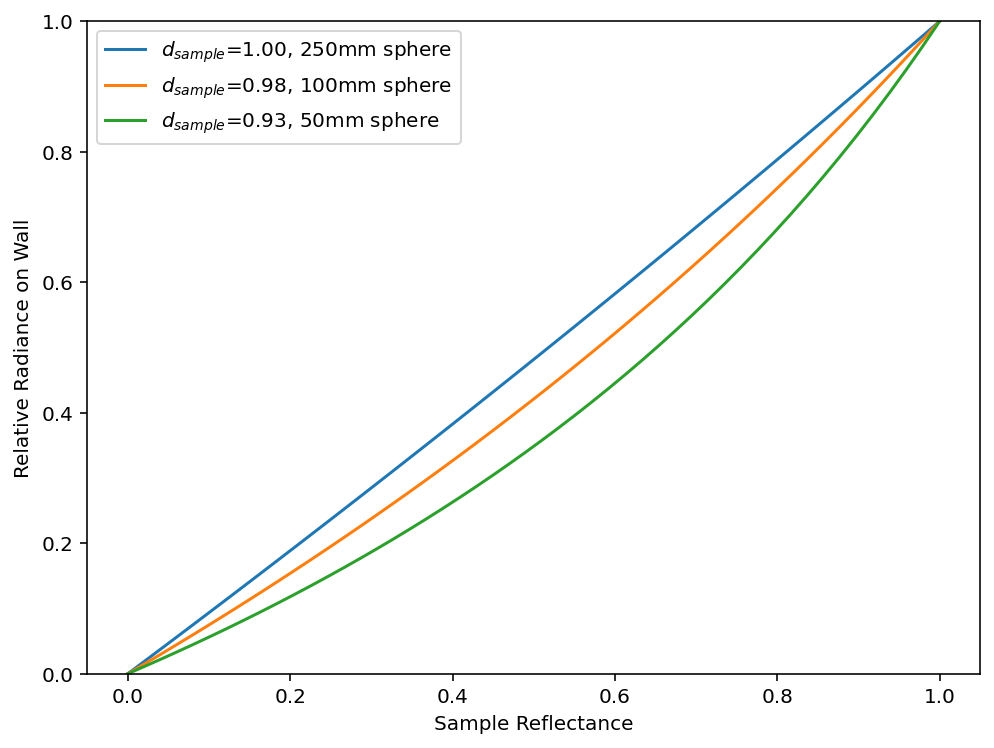

In [9]:
r_sample = np.linspace(0.0,1,50)
plt.figure(figsize=(8,6))

s = iadpython.sphere.Sphere(250, d_sample=20, d_detector = 12.7, d_entrance=12.7, r_detector=0.2)
M = s.multiplier(r_sample,r_sample,0.98)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d_sphere)
plt.plot(r_sample, M/np.max(M), label=label)

s.d_sphere=100
M = s.multiplier(r_sample,r_sample,0.98)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d_sphere)
plt.plot(r_sample, M/np.max(M), label=label)

s.d_sphere=50
M = s.multiplier(r_sample,r_sample,0.98)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d_sphere)
plt.plot(r_sample, M/np.max(M), label=label)

plt.legend()
plt.xlabel('Sample Reflectance')
plt.ylabel('Relative Radiance on Wall')
plt.ylim(0,1)

plt.show()

Assume that a sphere is illuminated with diffuse light having a power *P*. Typically, the source of this diffuse light is light reflected by (or transmitted through) the sample.

We  assume that this diffuse light can reach all parts of sphere — specifically, that light from this source is not blocked by a baffle.  Multiple reflections within the sphere will increase the power falling on non-white areas in the sphere (e.g., the sample, detector, and entrance). 

The total light at a point is the sum of all light reaching that point.  The fraction of light hitting the wall, the sample port, the detector port, and the entrance port is

$$
P = P_\mathrm{wall} + P_\mathrm{sample} + P_\mathrm{detector} + P_\mathrm{entrance}
$$

For the first incidence we then have,

$$
P_\mathrm{wall}^{(1)} = a_\mathrm{wall} P, \qquad P_\mathrm{sample}^{(1)} = a_\mathrm{sample} P, \qquad P_\mathrm{detector}^{(1)} = a_\mathrm{detector} P , \qquad P_\mathrm{entrance}^{(1)} = a_\mathrm{entrance} P
$$

The light bouncing and incident on the wall for a second time

The light from the detector and sample is multiplied by $(1-a_\mathrm{entrance})$ and
not by $a_\mathrm{wall}$ because the light from the detector (and sample) is not
allowed to hit either the detector or sample.  

The second incidence on
the wall is

$$
P_\mathrm{wall}^{(2)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(1)} + (1-a_\mathrm{entrance}) r_\mathrm{detector} P_\mathrm{detector}^{(1)} + (1-a_\mathrm{entrance})r_\mathrm{sample}
 P_\mathrm{sample}^{(1)}
$$

The light that hits the wall after $k$ bounces has the same form as above 

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{detector}  P_\mathrm{detector}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{sample} P_\mathrm{sample}^{(k-1)}
$$

Since the light falling on the sample and detector must come from the wall

$$
P_\mathrm{sample}^{(k)} = a_\mathrm{sample} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} \qquad\hbox{and}\qquad  P_\mathrm{detector}^{(k)} = a_\mathrm{detector}
r_\mathrm{wall} P_\mathrm{wall}^{(k-1)},
$$

Therefore,

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
P_\mathrm{wall}^{(k-2)}
$$

The total power falling on the wall is just

$$
P_\mathrm{wall} = \sum_{k=1}^\infty P_\mathrm{wall}^{(k)} = 
\frac{a_\mathrm{wall} + (1-a_\mathrm{entrance}) ( a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample})}
     {1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})} P
$$

The total power falling the detector is

$$
P_\mathrm{detector} = a_\mathrm{detector} P + \sum_{k=2}^\infty a_\mathrm{detector} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} = a_\mathrm{detector} P + a_\mathrm{detector} r_\mathrm{wall}
P_\mathrm{wall}
$$

The gain $G(r_\mathrm{diffuse})$ on the irradiance on the detector (relative to a black sphere),

$$
G(r_\mathrm{sample}) \equiv \frac{P_\mathrm{detector} /A_\mathrm{detector}}{P/A} 
$$

in terms of the sphere parameters

$$
G(r_\mathrm{sample})  = 1+ {1\over a_\mathrm{wall}} \cdot {a_\mathrm{wall} r_\mathrm{wall} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector}
+a_\mathrm{sample} r_\mathrm{sample})  \over 1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$

The gain for a detector in a transmission sphere is similar, but with
primed parameters to designate a second potential sphere that is used.
For a black sphere the gain $G(0) = 1$, which is easily verified by
setting $r_\mathrm{wall}=0$, $r_\mathrm{diffuse}=0$, and $r_\mathrm{detector}=0$.  Conversely, when the
sphere wall and sample are perfectly white, the irradiance at the
entrance port, the sample port, and the detector port must increase so
that the total power leaving via these ports is equal to the incident
diffuse power $P$.  

Thus the gain should be the ratio of the sphere wall area over the area
of the ports through which light leaves or $G(1)=A/(A_\mathrm{entrance}+A_\mathrm{detector})$ which
follows immediately from the gain formula with $r_\mathrm{wall}=1$, $r_\mathrm{diffuse}=1$,
and $r_\mathrm{detector}=0$.

The gain $G(r_\mathrm{sample})$ on the irradiance on the detector (relative to a black sphere),
$$
G(r_\mathrm{sample}) \equiv {P_\mathrm{detector} /A_\mathrm{detector}\over P/A} 
$$
in terms of the sphere parameters
$$
G(r_\mathrm{sample})  = 1+ {a_\mathrm{wall} r_\mathrm{wall} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample}) 
\over 1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$